# Erstes Beispiel in Data Science mit dem Iris-Datensatz

### CAS Data Science FHNW, A. Csillaghy, FS20

Dieser Datensatz besteht aus 3 verschiedenen Arten von Irisblenden:
Setosa, Versicolor und Virginica. Die länge in cm der Blütenblätter und Kelchblätter
sind in einem 150x4 numpy.ndarray gespeichert.

Die Zeilen enthalten die Messungen der einzelnen Blumen; die Spalten enthalten
Kelchlänge, Kelchbreite, Blütenblattlänge und Blütenblattbreite.

Siehe <https://en.wikipedia.org/wiki/Iris_flower_data_set> für mehr Informationen zu diesem Datensatz.

Hier zeigen wir, wie man mit zwei Algorithmen umgeht, einer ist eine einfache lineare Regression und der andere ist ein der einfachsten Machine Learning Algorithmus, K-Means. Dies soll auch den Einsatz von Python für Data Science veranschaulichen.


Zuerst importeren wir einige Programme und Daten: 

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

"sklearn", genannt Scikit-Learn ist ein Machine Learning package. Dort sind die Daten von dem Iris-Datensatz schon als Beispiel enthalten. Um es einfacher zu machen, nehmem wir nur die zwei ersten Werte, also Kelchblatt-Länge und Kelchblatt-Breite, und speichern wir sie in der Variable "sepals". In der Variable "classes" speichern wir die Klassifikationen, die von Menschen bestimmt worden sind: 

In [2]:
iris = datasets.load_iris()
sepals = iris.data[:,:2]
classes = iris.target

Diese sind Beispiele von Kelchlänge und Kelchbreite:

In [3]:
len(classes)

150

In "classes" befinden sich die Klassen, die von Meschen bestimmt worden sind. Das wird auch oft als "Ground Truth" bezeichnet. Diese Werte entsprechen die drei Typen von Iris.  

In [5]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Jetz schauen wir uns die Daten an. Wir plotten die Kelchblatt-Länge gegenüber der Kelchblatt-Breiten:

Text(0, 0.5, 'Sepal width')

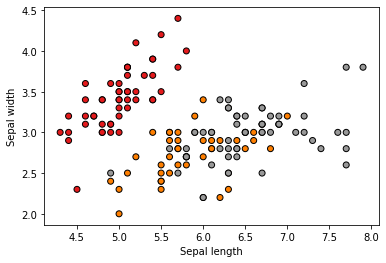

In [6]:
plt.scatter( sepals[:,0], sepals[:,1], c=classes[:], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Nun sollen wir in dem ersten Teil, wo wir die Regression ausprobieren, nur auch die roten Punkten fokkusieren:

In [7]:
cls_idx = (classes == 0)
cls_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Wie sehen die Daten aus der ersten Klasse, also die Klasse 0, aus? Um das zu anschauen benutzen wir den Index, den wir soeben gabaut haben: 

Text(0, 0.5, 'Sepal width')

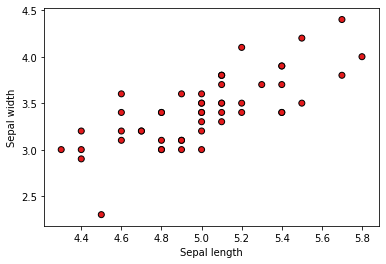

In [8]:
plt.scatter( sepals[cls_idx,0], sepals[cls_idx,1], c=classes[cls_idx], cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Wenn man diese Daten von Auge einschätzt, sieht man eine gewisse Korrelation: Wenn die Kelchenlänge gösser wird, wird auch die Kelchenbreite grösser. Diese Korrelation kann man mit einer Gerade modellieren: 

In [9]:
# import a few more algorithms
from numpy import polyfit, poly1d, linspace

"numpy" ist eine sehr verbreitete Bibliothek, die viele Funktionen für numerische Auswertungen enthält. Eine sehr einfache lineare Regression kann mit ployfit gemacht werden. Die Werte, die von der Funktion zurückgegeben werden, sind in der Variable "linear_fit" gespeichert und bezeichnen die Steigung und Ursrprung der Gerade.  

In [10]:
linear_fit=polyfit(sepals[cls_idx,0], iris.data[cls_idx,1], 1)
linear_fit

array([ 0.7985283 , -0.56943267])

poly1d macht es sehr einfach, den Wert für irgendeinen Punkt auf der berechneten Gerade zu berechnen: 

In [11]:
linear_model = poly1d(linear_fit)

In [12]:
linear_model(1000)

797.9588679741133

Jetzt bleibt uns übrig, unser Modell mit den Ursprungsdaten zu vergleichen: 

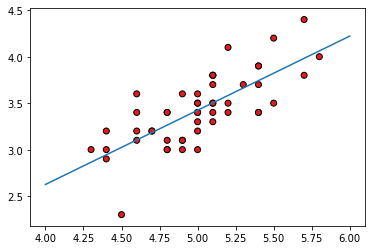

In [13]:
plt.scatter(sepals[cls_idx, 0], sepals[cls_idx, 1], c=classes[cls_idx], cmap=plt.cm.Set1,edgecolor='k')
plt.plot([4,6], [linear_model(4),linear_model(6)])

Kann man dieses Modell an der gesamten Menge anwenden? Nein! Unsere lineare Regression ist nur für eine einzelne Klasse brauchbar: 

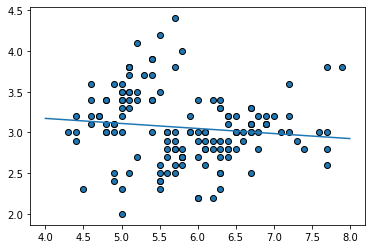

In [14]:
linear_fit=polyfit(sepals[:,0], sepals[:,1], 1)
linear_model = poly1d(linear_fit)
plt.scatter(sepals[:, 0], sepals[:, 1], cmap=plt.cm.Set1,edgecolor='k')
plt.plot([4,8], [linear_model(4),linear_model(8)])

Tatsächlich sieht man, dass diese Gerade keine richtige Aussage für die gesamte Datenmenge lierfert. Wir können lange ausprobieren, wir werden nie eine Gerade finden, die diese Punkte richtig beschreibt (d.h.: modelliert). Das kommt von der Tatsache, dass es eben verschiedene Klassen gibt, und dass wir ein komplexeres Modell brauchen, um diese Daten zu beschreiben. Wir wissen aus der Klassifikation, die von Menschen (die Expertinnen und Experten in Botanik) durchgeführt worden ist, dass es diese verschiedene Klassen gibt -- das ist unser Ground Truth. Deshalb suchen wir jetzt einen etwas komplexeres Modell, der uns für eine beliebige Messung die zugehörige Klasse vorhersagen kann. 

Ein solches Modell kann dank dem Algorithmus K-Means gelierfert werden. Hier wird er noch quasi als "black box" angewendet. Später in dem Kurs werden wir es in Details anschauen. 

In [24]:
from sklearn.cluster import KMeans

In [25]:
cluster_model = KMeans( n_clusters=3 )
cluster_model.fit(iris.data)
labels = cluster_model.labels_[:]
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Jetzt sehen wir, dass dieses Modell den Daten besser angepasst ist. Wir finden Klassifikationen in den drei Klassen, die der Realität nahe kommt. Es ist zwar nicht ganz ähnlich, und hat schon noch falsch klassifiziere Punkte. Der dritte Plot zeigt an, welche nicht richtig kalssifiziert sind.

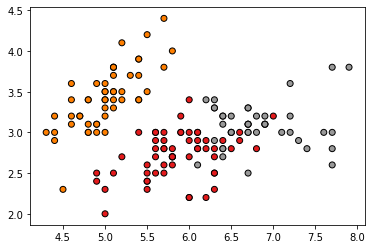

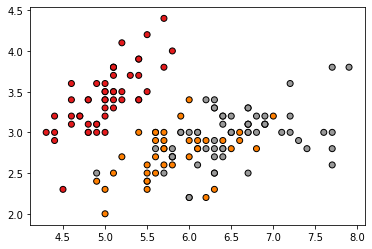

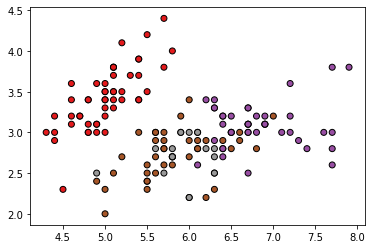

In [26]:
plt.figure(1)
plt.scatter(sepals[:, 0], sepals[:, 1], c=cluster_model.labels_, cmap=plt.cm.Set1,edgecolor='k')
plt.figure(2)
plt.scatter(sepals[:, 0], sepals[:, 1], c=classes, cmap=plt.cm.Set1,edgecolor='k')
plt.figure(3)
plt.scatter(sepals[:, 0], sepals[:, 1], c=classes-cluster_model.labels_, cmap=plt.cm.Set1,edgecolor='k')

In [30]:
# now, KMeans messes up sometimes the classes numbers, so we have to reorder to be able to see the accuracy
corrected_labels = classes.copy()
corrected_labels[cluster_model.labels_ == 1]=0
#corrected_labels[cluster_model.labels_ == 2]=1
corrected_labels[cluster_model.labels_ == 0]=1

# Now take this opportunity to compute the accuracy
(((classes-cluster_model.labels_)!=0).sum())/len(classes)

0.76

In [31]:
corrected_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

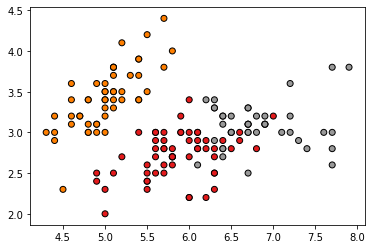

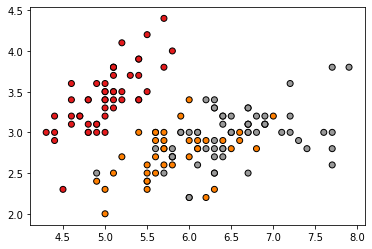

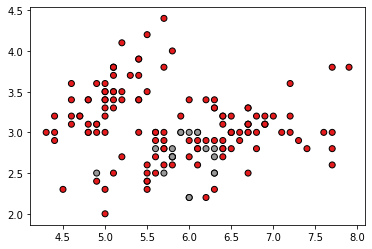

In [32]:
plt.figure(1)
plt.scatter(sepals[:, 0], sepals[:, 1], c=cluster_model.labels_, cmap=plt.cm.Set1,edgecolor='k')
plt.figure(2)
plt.scatter(sepals[:, 0], sepals[:, 1], c=classes, cmap=plt.cm.Set1,edgecolor='k')
plt.figure(3)
plt.scatter(sepals[:, 0], sepals[:, 1], c=classes-corrected_labels, cmap=plt.cm.Set1,edgecolor='k')

Das ist ein erster Einsicht gewesen. Es ist aber anzumerken, dass wir hier hauptsächlich mit zwei Dimensionen gearbeitet haben. Das ist eine drastische Reduzierung, die wir schon bei K-Means ausgelassen haben. Um ein vollständiges Verständnis zu bekommen, muss man unbedingt alle Dimensionen berücksichtigen. Dann wir es sofort schwieriger, da wir nur gut sind für drei Dimensionen sind. Deshalb werden multidimensionale Räume sofort abstrakter.

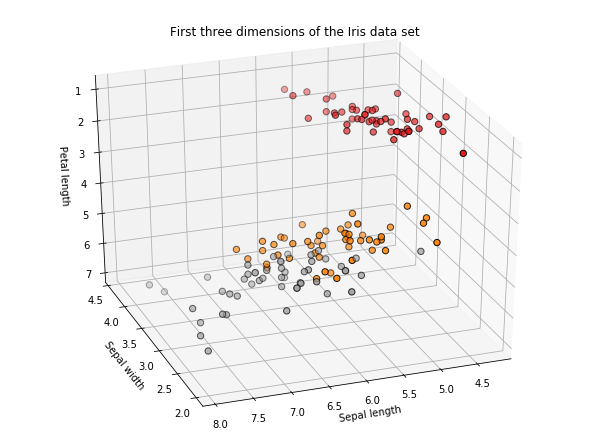

In [33]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=classes,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three dimensions of the Iris data set")
ax.set_xlabel("Sepal length")
#ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal width")
#ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal length")
#ax.w_zaxis.set_ticklabels([])

plt.show()